In [1]:
#Run this notebook in the root directory of the project
%cd ../../../

/data/main/2024/GridCellsCond


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sim_utils as s_utils
import analysis_utils as a_utils
from matplotlib.pyplot import cm
import seaborn as sns
import h5py
import pandas as pd
import matplotlib.patches as patches

In [3]:
sim_id = "VALD-HCN-SHRK-S-m-3a"
params = s_utils.load_sim_params(sim_id)["0"]
gh_range_arr= np.array([0.0015,0])
dc_range_arr = np.linspace(0.001245,0.006,1000,endpoint=True)
n_trials = 1
sim_num = 0
multiple_input_params = {}
sim_dur=params["sim_dur"]
knock_out_arr  = np.zeros((gh_range_arr.shape[0],dc_range_arr.shape[0],n_trials,5))
fr_rates_orig = np.zeros((gh_range_arr.shape[0],dc_range_arr.shape[0],n_trials))
with h5py.File("data/VALD-HCN-SHRK-S-m-3a/VALD-HCN-SHRK-S-m-3a-grid-props.hdf5","r") as f:
    for i,gh in enumerate(gh_range_arr):
        for j,dc in enumerate(dc_range_arr):
            for tr in range(n_trials):
                knock_out_arr[i,j,tr,:]=np.array(f[f"{sim_num}"])
                sim_num +=1
sim_num = 0
with h5py.File("data/VALD-HCN-SHRK-S-m-3a/intrnrn_spks_VALD-HCN-SHRK-S-m-3a.hdf5","r") as f:
    for i,gh in enumerate(gh_range_arr):
        for j,dc in enumerate(dc_range_arr):
            for tr in range(n_trials):
                print(sim_num,end=" ")
                intrnrn_spks_arr = np.array(f[f"{sim_num}"]["intrnrn_spks"])
                intrnrn_spikes_l = [list(cell[~np.isnan(cell)]) for cell in intrnrn_spks_arr]		
                fr_rates_orig[i,j,tr]=a_utils.calc_firing_rates(intrnrn_spikes_l,sim_dur)
                sim_num +=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [4]:
sim_id = "VALD-HCN-SHRK-S-m-4a"
params_inhib = s_utils.load_sim_params(sim_id)["0"]
dc_range_arr = np.linspace(0.001245,0.006,1000,endpoint=True)
n_trials = 1
sim_num = 0
sim_dur = params_inhib["sim_dur"]
knock_out_arr_inhib  = np.zeros((dc_range_arr.shape[0],n_trials,5))
fr_rates_inhib= np.zeros((dc_range_arr.shape[0],n_trials))

with h5py.File("data/VALD-HCN-SHRK-S-m-4a/VALD-HCN-SHRK-S-m-4a-grid-props.hdf5","r") as f:
    for i,dc in enumerate(dc_range_arr):
        for tr in range(n_trials):
            knock_out_arr_inhib[i,tr,:]=np.array(f[f"{sim_num}"])
            sim_num +=1
sim_num = 0            
with h5py.File("data/VALD-HCN-SHRK-S-m-4a/intrnrn_spks_VALD-HCN-SHRK-S-m-4a.hdf5","r") as f:
    for i,dc in enumerate(dc_range_arr):
        for tr in range(n_trials):
            print(sim_num,end=" ")
            intrnrn_spks_arr = np.array(f[f"{sim_num}"]["intrnrn_spks"])
            intrnrn_spikes_l = [list(cell[~np.isnan(cell)]) for cell in intrnrn_spks_arr]	
            fr_rates_inhib[i,tr]=a_utils.calc_firing_rates(intrnrn_spikes_l,sim_dur)
            sim_num +=1
            

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [5]:
scale_n_wt = knock_out_arr[0,:,0,0]
scale_n_ko = knock_out_arr[1,:,0,0]
scale_n_inhib = knock_out_arr_inhib[:,0,0]

field_n_wt = knock_out_arr[0,:,0,1]
field_n_ko = knock_out_arr[1,:,0,1]
field_n_inhib = knock_out_arr_inhib[:,0,1]

scale_t_wt = knock_out_arr[0,:,0,2]
scale_t_ko = knock_out_arr[1,:,0,2]
scale_t_inhib = knock_out_arr_inhib[:,0,2]

field_t_wt = knock_out_arr[0,:,0,3]
field_t_ko = knock_out_arr[1,:,0,3]
field_t_inhib = knock_out_arr_inhib[:,0,3]
# bins = ["1.245-2.196","2.196-3.147","3.147-4.098","4.098-5.049","5.049-6"]
bins_list = ["0-0.2", " 0.2-0.4", " 0.4-0.6", " 0.6-0.8", " 0.8-1"]

# bins = ["1.245-2.196","2..196-3.147","3.147-4.098","4.098-5.049","5.049-0006"]
# bins_list = ["1.245-2.196","2.196-3.147","3.147-4.098","4.098-5.049","5.049-6.00"]



bins = [i for i in bins_list for k in range(200)]

In [6]:
df_n_scales=pd.DataFrame()
df_n_scales["Bump Scale (neurons)"]=np.concatenate((scale_n_wt,scale_n_ko,scale_n_inhib))
df_n_scales["Input DC (nA)"]=np.concatenate((bins,bins,bins))
temp = ["WT","KO","KO - restored inhibition"]
df_n_scales["HCN"]=[i for i in temp for k in range(1000)]

df_n_field=pd.DataFrame()
df_n_field["Bump Size (neurons)"]=np.concatenate((field_n_wt,field_n_ko,field_n_inhib))
df_n_field["Input DC (nA)"]=np.concatenate((bins,bins,bins))
temp = ["WT","KO","KO - restored inhibition"]
df_n_field["HCN"]=[i for i in temp for k in range(1000)]

df_t_scales=pd.DataFrame()
df_t_scales["Grid Scale (ms)"]=np.concatenate((scale_t_wt,scale_t_ko,scale_t_inhib))
df_t_scales["Input DC (nA)"]=np.concatenate((bins,bins,bins))
temp = ["WT","KO","KO - restored inhibition"]
df_t_scales["HCN"]=[i for i in temp for k in range(1000)]

df_t_field=pd.DataFrame()
df_t_field["Grid Field Size (ms)"]=np.concatenate((field_t_wt,field_t_ko,field_t_inhib))
df_t_field["Input DC (nA)"]=np.concatenate((bins,bins,bins))
temp = ["WT","KO","KO - restored inhibition"]
df_t_field["HCN"]=[i for i in temp for k in range(1000)]





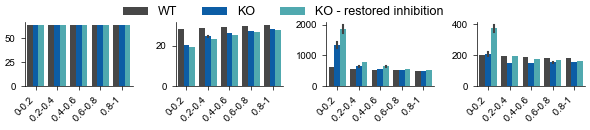

In [7]:
from matplotlib.ticker import ScalarFormatter

sci_formatter = ScalarFormatter(useMathText=True)
sci_formatter.set_scientific(True)
sci_formatter.set_powerlimits((-2, 2))  # Force scientific formatting for small/large numbers
%matplotlib inline
plt.style.use("analysis/config/paper.mplstyle")
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
fig,axs = plt.subplots(1,4,figsize=(7.229,0.836))
sns.barplot(df_n_scales,x="Input DC (nA)",y="Bump Scale (neurons)",hue="HCN",orient="v",palette=["#474747","#0C5DA5",cm.Spectral(0.84)],ax=axs[0],saturation=1,width=0.8,errorbar="se")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

leg=axs[0].legend(title="HCN",fontsize=9,loc=(1.8,0.8),title_fontsize=8).set_visible(False)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize=9,loc=(0.2,0.82),title_fontsize=8,ncols=3)

sns.barplot(df_n_field,x="Input DC (nA)",y="Bump Size (neurons)",hue="HCN",orient="v",palette=["#474747","#0C5DA5",cm.Spectral(0.84)],ax=axs[1],saturation=1,width=0.8,errorbar="se")
axs[1].legend(fontsize=8).set_visible(False)

axs[1].set_xlabel("")


axs[1].set_ylabel("")


sns.barplot(df_t_scales,x="Input DC (nA)",y="Grid Scale (ms)",hue="HCN",orient="v",palette=["#474747","#0C5DA5",cm.Spectral(0.84)],ax=axs[2],saturation=1,width=0.8,errorbar="se")

axs[2].set_xlabel("")
axs[2].legend(fontsize=8).set_visible(False)

axs[2].set_ylabel("")
sns.barplot(df_t_field,x="Input DC (nA)",y="Grid Field Size (ms)",hue="HCN",orient="v",palette=["#474747","#0C5DA5",cm.Spectral(0.84)],ax=axs[3],saturation=1,width=0.8,errorbar="se")

axs[3].legend().set_visible(False)
# axs[3].xaxis.set_major_formatter(sci_formatter)

axs[3].set_xlabel("")
axs[3].set_ylabel("")

for ax in axs:
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
plt.subplots_adjust(wspace=0.4)

plt.savefig("analysis/figures/Fig4/Fig4_E.svg")




In [8]:
def grid_props(stell_spks_l,params):
    scale_n=a_utils.grid_scale_neurons(stell_spks_l,params["sim_dur"],win_size=100)
    field_n=a_utils.grid_field_sizes_neurons(stell_spks_l,params["sim_dur"],win_size_t=100)

    scale_t=a_utils.calc_grid_scales_time(stell_spks_l)
    field_t=a_utils.calc_grid_field_sizes_time(stell_spks_l)
    return {"Grid Scale (N)":scale_n,"Grid Field (N)":field_n,"Grid Scale (T)":scale_t,"Grid Field (T)":field_t}


In [9]:
sim_id_wt = 'VALD-HCN-SHRK-S-s-1a'
sim_id_ko = 'VALD-HCN-SHRK-S-s-2a'

params_wt=s_utils.load_sim_params(sim_id_wt)
params_ko=s_utils.load_sim_params(sim_id_ko)

stell_spikes_l_wt,intrnrn_spikes_l_wt=s_utils.load_spikes(sim_id=sim_id_wt)
stell_spikes_l_ko,intrnrn_spikes_l_ko=s_utils.load_spikes(sim_id=sim_id_ko)

perodic_act_wt = a_utils.periodic_activity_all(stell_spikes_l_wt[:params_wt["N_per_sheet"]],params_wt["sim_dur"],window_t=200,stdev=4)
perodic_act_wt=perodic_act_wt/np.max(perodic_act_wt,axis=1)[:,None]
perodic_act_ko = a_utils.periodic_activity_all(stell_spikes_l_ko[:params_ko["N_per_sheet"]],params_ko["sim_dur"],window_t=200,stdev=4)
perodic_act_ko=perodic_act_ko/np.max(perodic_act_ko,axis=1)[:,None]




In [10]:
print(grid_props(stell_spikes_l_wt[:192],params_wt))
print(grid_props(stell_spikes_l_ko[:192],params_ko))


/data/main/2024/GridCellsCond/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/main/2024/GridCellsCond/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'Grid Scale (N)': 61.29041666666666, 'Grid Field (N)': 26.061563546841953, 'Grid Scale (T)': nan, 'Grid Field (T)': nan}
{'Grid Scale (N)': 53.635625, 'Grid Field (N)': 18.38829340508701, 'Grid Scale (T)': 27.929996, 'Grid Field (T)': 11.112499}


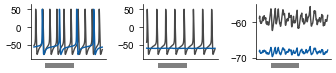

In [36]:
%matplotlib inline
end = 20000
start = 19760
t= np.arange(start/1000,end/1000,0.0001)
plt.style.use("analysis/config/paper.mplstyle")
fig,axs = plt.subplots(1,3,figsize=(3.878,0.715))
stell_v_wt = s_utils.load_data("VALD-HCN-SHRK-S-s-1a","stell_v",125)
stell_v_ko= s_utils.load_data("VALD-HCN-SHRK-S-s-2a","stell_v",125)
axs[2].plot(t,stell_v_wt[int(start/0.1):int(end/0.1)],label="HCN wild type",c="#474747")
axs[2].plot(t,stell_v_ko[int(start/0.1):int(end/0.1)],label="HCN knockout",c="#0C5DA5")

stell_v_wt = s_utils.load_data("VALD-HCN-SHRK-S-s-1a","stell_v",120)
stell_v_ko= s_utils.load_data("VALD-HCN-SHRK-S-s-2a","stell_v",120)
axs[1].plot(t,stell_v_wt[int(start/0.1):int(end/0.1)],c="#474747")
axs[1].plot(t,stell_v_ko[int(start/0.1):int(end/0.1)],c="#0C5DA5")

stell_v_wt = s_utils.load_data("VALD-HCN-SHRK-S-s-1a","stell_v",115)
stell_v_ko= s_utils.load_data("VALD-HCN-SHRK-S-s-2a","stell_v",115)
axs[0].plot(t,stell_v_wt[int(start/0.1):int(end/0.1)],c="#474747")
axs[0].plot(t,stell_v_ko[int(start/0.1):int(end/0.1)],c="#0C5DA5")
fig.subplots_adjust(wspace=0.5)
rect1 = patches.Rectangle((19.8, -115), 0.1, 15, edgecolor='none', facecolor='gray',clip_on=False)
axs[0].add_patch(rect1)
axs[0].set_ylim([-90,65])
plt.draw()

rect2 = patches.Rectangle((19.8, -115), 0.1, 15, edgecolor='none', facecolor='gray',clip_on=False)
axs[1].add_patch(rect2)
axs[1].set_ylim([-90,65])
plt.draw()

rect3 = patches.Rectangle((19.8, -72.8), 0.1, 1.5, edgecolor='none', facecolor='gray',clip_on=False)
axs[2].add_patch(rect3)
# axs[2].set_ylim([-90,65])
plt.draw()

# yticks = axs[0].get_yticks()
# axs.set_yticks([yticks[1], yticks[-2]])
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[2].set_xticks([])


plt.savefig("analysis/figures/Fig4/Fig4_B_bottom.svg")



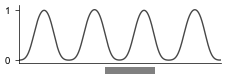

In [111]:
sim_id="VALD-HCN-SHRK-S-s-3a"
params = s_utils.load_sim_params(sim_id)
stell_spks_l,intrnrn_spks_l = s_utils.load_spikes(sim_id)
cell_to_analyse = 115
instant_rate_stell = a_utils.instant_rate(stell_spks_l[cell_to_analyse],params["sim_dur"],stdev=100)
t = np.arange(0,params["sim_dur"])
plt.style.use("analysis/config/paper.mplstyle")
fig,ax = plt.subplots(1,1,figsize=(2.601,0.757))
ax.plot(t,instant_rate_stell/np.max(instant_rate_stell[1000:]),c="#474747")
ax.set_ylim([-0.05,1.1])
ax.set_xlim([1300,5300])
rect = patches.Rectangle((3000, -0.27),1000, 0.14, edgecolor='none', facecolor='gray',clip_on=False)
ax.add_patch(rect)
plt.draw()
ax.set_xticks([])
plt.savefig("analysis/figures/Fig4/Fig4_a.svg")

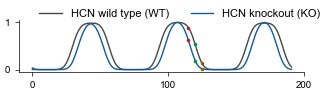

In [77]:

%matplotlib inline
dist = np.arange(params_wt["N_per_sheet"])
periodic_act_to_plot=[perodic_act_wt[150],perodic_act_ko[150]]
colors_stell = cm.Blues_r(np.linspace(0,0.5,len(periodic_act_to_plot)))
colors_stell = [cm.Spectral(0.097),cm.Spectral(0.91)]
plt.style.use("analysis/config/paper.mplstyle")
fig,axs = plt.subplots(1,1,figsize=(3.678,0.674))

legend_loc=[(0,1),(0,0.8)]
axs.plot(dist,periodic_act_to_plot[0],c="#474747",linewidth=1,label="HCN wild type (WT)")
axs.scatter(125,periodic_act_to_plot[0][125],s=2.5,zorder=99,c="#916300ff")
axs.scatter(120,periodic_act_to_plot[0][120],s=2.5,zorder=99,c="#009638ff")
axs.scatter(115,periodic_act_to_plot[0][115],s=2.5,zorder=99,c="#b92231ff")
axs.plot(dist,periodic_act_to_plot[1],c="#0C5DA5",linewidth=1,label="HCN knockout (KO)")
axs.scatter(125,periodic_act_to_plot[1][125],s=2.5,zorder=99,c="#916300ff")
axs.scatter(120,periodic_act_to_plot[1][120],s=2.5,zorder=99,c="#009638ff")
axs.scatter(115,periodic_act_to_plot[1][115],s=2.5,zorder=99,c="#b92231ff")
axs.legend(ncols=2,bbox_to_anchor=(0,0,1.09,1.4))
plt.draw()
xticks = axs.get_xticks()
axs.set_xticks([xticks[1],xticks[int(len(xticks)/2)], xticks[-2]])


plt.savefig("analysis/figures/Fig4/Fig4_B_top.svg")
plt.show()


In [78]:
sim_id = "VALD-HCN-SHRK-S-m-1a"
params = s_utils.load_sim_params(sim_id)["0"]
gh_range_arr= np.array([0.0015,0])
dc_range_arr = np.linspace(-2.7e-3,1e-2,1000,endpoint=True)
n_trials = 1
sim_num = 0
multiple_input_params = {}
sim_dur=params["sim_dur"]
knock_out_arr  = np.zeros((gh_range_arr.shape[0],dc_range_arr.shape[0],n_trials,5))
fr_rates_orig = np.zeros((gh_range_arr.shape[0],dc_range_arr.shape[0],n_trials))
with h5py.File("data/VALD-HCN-SHRK-S-m-1a/VALD-HCN-SHRK-S-m-1a-grid_props.hdf5","r") as f:
    for i,gh in enumerate(gh_range_arr):
        for j,dc in enumerate(dc_range_arr):
            for tr in range(n_trials):
                knock_out_arr[i,j,tr,:]=np.array(f[f"{sim_num}"])
                sim_num +=1
sim_num = 0
with h5py.File("data/VALD-HCN-SHRK-S-m-1a/intrnrn_spks_VALD-HCN-SHRK-S-m-1a.hdf5","r") as f:
    for i,gh in enumerate(gh_range_arr):
        for j,dc in enumerate(dc_range_arr):
            for tr in range(n_trials):
                print(sim_num,end=" ")
                intrnrn_spks_arr = np.array(f[f"{sim_num}"]["intrnrn_spks"])
                intrnrn_spikes_l = [list(cell[~np.isnan(cell)]) for cell in intrnrn_spks_arr]		
                fr_rates_orig[i,j,tr]=a_utils.calc_firing_rates(intrnrn_spikes_l,sim_dur)
                sim_num +=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [79]:
sim_id = "VALD-HCN-SHRK-S-m-2a"
params_inhib = s_utils.load_sim_params(sim_id)["0"]
dc_range_arr = np.linspace(-2.7e-3,1e-2,1000,endpoint=True)
n_trials = 1
sim_num = 0
sim_dur = params_inhib["sim_dur"]
knock_out_arr_inhib  = np.zeros((dc_range_arr.shape[0],n_trials,5))
fr_rates_inhib= np.zeros((dc_range_arr.shape[0],n_trials))

with h5py.File("data/VALD-HCN-SHRK-S-m-2a/VALD-HCN-SHRK-S-m-2a-grid_props.hdf5","r") as f:
    for i,dc in enumerate(dc_range_arr):
        for tr in range(n_trials):
            knock_out_arr_inhib[i,tr,:]=np.array(f[f"{sim_num}"])
            sim_num +=1
sim_num = 0            
with h5py.File("data/VALD-HCN-SHRK-S-m-2a/intrnrn_spks_VALD-HCN-SHRK-S-m-2a.hdf5","r") as f:
    for i,dc in enumerate(dc_range_arr):
        for tr in range(n_trials):
            print(sim_num,end=" ")
            intrnrn_spks_arr = np.array(f[f"{sim_num}"]["intrnrn_spks"])
            intrnrn_spikes_l = [list(cell[~np.isnan(cell)]) for cell in intrnrn_spks_arr]	
            fr_rates_inhib[i,tr]=a_utils.calc_firing_rates(intrnrn_spikes_l,sim_dur)
            sim_num +=1
            

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

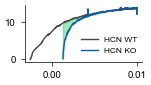

In [101]:
%matplotlib inline
dc_range_arr_zoom = np.linspace(0.001245,0.006,1000,endpoint=True)
plt.style.use("analysis/config/paper.mplstyle")
fig,ax=plt.subplots(figsize=(1.518,0.742))
sns.lineplot(x=dc_range_arr[5:],y=knock_out_arr[0,5:,0,4].ravel(),label="HCN WT",linewidth=1,c="#474747")
sns.lineplot(x=dc_range_arr[310:],y=knock_out_arr[1,310:,0,4].ravel(),label="HCN KO",c="#0C5DA5",linewidth=1)
ax.fill_between(dc_range_arr[310:686], knock_out_arr[1,310:686,0,4].ravel(),knock_out_arr[0,310:686,0,4].ravel(),color=(0,185/255,69/255,0.35))
x=np.arange(-0.0027,0.002,0.0001)
y = np.arange(0,80)
plt.legend(loc=(0.45,0.08),ncols=1,fontsize=6)
plt.draw()
xticks = ax.get_xticks()
ax.set_xticks([xticks[1],xticks[-2]])
plt.savefig("analysis/figures/Fig4/Fig4_D.svg",bbox_inches="tight")


/data/main/2024/GridCellsCond/.venv/lib/python3.12/site-packages/seaborn/relational.py:438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)


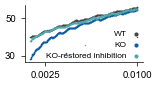

In [100]:
%matplotlib inline

dc_range_arr_inhib = np.linspace(-2.7e-3,1e-2,1000,endpoint=True)
dc_range_arr = np.linspace(-2.7e-3,1e-2,1000,endpoint=True)
plt.style.use("analysis/config/paper.mplstyle")
fig,ax=plt.subplots(figsize=(1.518,0.742))

sns.scatterplot(x=dc_range_arr[315:],y=fr_rates_orig[0,315:,:].ravel(),s=1,label="WT",c="#474747",linewidth=0)
sns.scatterplot(x=dc_range_arr[315:],y=fr_rates_orig[1,315:,:].ravel(),s=1,label="KO",linewidth=0,c="#0C5DA5")
sns.scatterplot(x=dc_range_arr_inhib[315:],y=fr_rates_inhib.ravel()[315:],s=1,label="KO-restored inhibition",linewidth=0,c=cm.Spectral(0.84))
plt.legend(loc=(0.15,-0.01),markerscale=3,ncols=1,fontsize=6,handletextpad=0.1,markerfirst=False)
plt.draw()
yticks = ax.get_yticks()
ax.set_yticks([yticks[1], yticks[-2]])
xticks = ax.get_xticks()
ax.set_xticks([xticks[1],xticks[-2]])
plt.savefig("analysis/figures/Fig4/Fig4_C.svg")
